# Self-Driving Car Engineer Nanodegree


## Project: **Advanced Lane Finding** 
***
In this project, your goal is to write a software pipeline to identify the lane boundaries in a video from a front-facing camera on a car. The camera calibration images, test road images, and project videos are available in the project repository.

---
**The Writeup**
The writeup will be the primary output you submit (along with your code of course).

Within the project repository, there is a writeup template that you can use as a starting point for your project writeup.

A great writeup should include the rubric points as well as your description of how you addressed each point. You should include a detailed description of the code used in each step (with line-number references and code snippets where appropriate) and links to other supporting documents or external references. You should also include images in your writeup to illustrate how your code works.

All that said, please be concise! We're not looking for you to write a book, just a brief description of how you passed each rubric point, and references to the relevant code :)

You are not required to use Markdown for your writeup. If you use another method, please just submit a PDF of your writeup.

**The Code**
Your code should stand on its own as readable material. Explain in code comments, as well as in your writeup, how your code works and why you wrote it that way.

Make it easy for a reviewer to understand your code.

You are more than welcome to use code from the lesson. But if you copy something explain how it works and why you used it.

**What It Takes to Pass**
Read the project rubric for details on the requirements for a passing submission.

Your writeup should include each rubric point and your description of how you addressed that point in your submission. The project repo provides an example template for your writeup.

There is no starter code provided, but you are welcome to use code from the lesson and quizzes as you like. You may complete the project in a Jupyter notebook, but it's not required. Feel free to build it as a standalone project.

To help the reviewer evaluate your project, please save example images from each stage of your pipeline to the output_images folder and provide in your writeup a description of each image. Please also save your output video and include it with your submission.

**Evaluation**
Once you have completed your project, double check the Project Rubric to make sure you have addressed all the rubric points. Your project will be evaluated by a Udacity reviewer according to that same rubric.

Your project must "meet specifications" in each category in order for your submission to pass. If you are happy with your submission, then you are ready to submit! If you see room for improvement in any category in which you do not meet specifications, keep working!

**Submission**
What to Include
Include a zipped file with your:

**writeup**
code (or a Jupyter notebook)
example output images
output video
Alternatively, you may submit a link to your GitHub repo for the project.

In either case, remember to include example images for each stage of your pipeline and your final output video in your submission.

---

**Run the cell below to import some packages.  If you get an `import error` for a package you've already installed, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt.  Also, see [this forum post](https://carnd-forums.udacity.com/cq/viewquestion.action?spaceKey=CAR&id=29496372&questionTitle=finding-lanes---import-cv2-fails-even-though-python-in-the-terminal-window-has-no-problem-with-import-cv2) for more troubleshooting tips.**  

## Import Packages

In [272]:
# Code Block 01
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
import glob
import os
from sklearn.externals import joblib
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Loading Images for Training

In [273]:
# Code Block 02
folder_cars1 = "training/small/vehicles_smallset/cars1/"
folder_noncars1 = "training/small/non-vehicles_smallset/notcars1/"
os.listdir(folder_cars1)

['270.jpeg',
 '312.jpeg',
 '114.jpeg',
 '128.jpeg',
 '269.jpeg',
 '248.jpeg',
 '328.jpeg',
 '37.jpeg',
 '239.jpeg',
 '362.jpeg',
 '335.jpeg',
 '365.jpeg',
 '215.jpeg',
 '290.jpeg',
 '230.jpeg',
 '261.jpeg',
 '350.jpeg',
 '30.jpeg',
 '234.jpeg',
 '267.jpeg',
 '254.jpeg',
 '260.jpeg',
 '149.jpeg',
 '161.jpeg',
 '289.jpeg',
 '103.jpeg',
 '217.jpeg',
 '264.jpeg',
 '214.jpeg',
 '200.jpeg',
 '392.jpeg',
 '94.jpeg',
 '134.jpeg',
 '305.jpeg',
 '173.jpeg',
 '176.jpeg',
 '13.jpeg',
 '148.jpeg',
 '40.jpeg',
 '33.jpeg',
 '66.jpeg',
 '83.jpeg',
 '146.jpeg',
 '188.jpeg',
 '107.jpeg',
 '374.jpeg',
 '9.jpeg',
 '165.jpeg',
 '356.jpeg',
 '387.jpeg',
 '283.jpeg',
 '224.jpeg',
 '388.jpeg',
 '343.jpeg',
 '99.jpeg',
 '204.jpeg',
 '60.jpeg',
 '62.jpeg',
 '318.jpeg',
 '80.jpeg',
 '245.jpeg',
 '4.jpeg',
 '10.jpeg',
 '351.jpeg',
 '287.jpeg',
 '379.jpeg',
 '338.jpeg',
 '111.jpeg',
 '36.jpeg',
 '77.jpeg',
 '2.jpeg',
 '72.jpeg',
 '129.jpeg',
 '400.jpeg',
 '327.jpeg',
 '225.jpeg',
 '74.jpeg',
 '35.jpeg',
 '207.jpeg

This image is: <class 'numpy.ndarray'> with dimesions: (64, 128, 3)


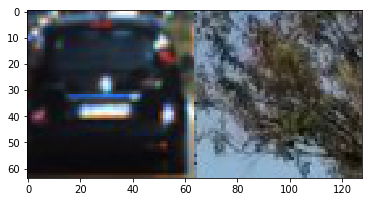

In [274]:
# Code Block 03
#reading in an image
image1 = mpimg.imread(folder_cars1+'272.jpeg')
image2 = mpimg.imread(folder_noncars1+'extra02.jpeg')
both = np.concatenate((image1,image2),axis = 1)
#printing out some stats and plotting
print('This image is:', type(both), 'with dimesions:', both.shape)
plt.imshow(both)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

## Ideas for Lane Detection Pipeline

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images
`cv2.cvtColor()` to grayscale or change color
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

**Check out the OpenCV documentation to learn about these and discover even more awesome functionality!**

## Helper Functions

Below are some helper functions to help get you started. They should look familiar from the lesson!

In [275]:
# Code Block 04
"""
This functions are mostly inherited for project 1 with some additionals
"""

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        # Use skimage.hog() to get both features and a visualization
        features ,hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell,pix_per_cell) , cells_per_block=(cell_per_block, cell_per_block), visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    else:      
        # Use skimage.hog() to get features only
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell,pix_per_cell) , cells_per_block=(cell_per_block, cell_per_block), visualise=vis, feature_vector=feature_vec)
        return features



## Test Images

Build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

It's important to know we are able to reach the test files first in order to try the pipeline

Hough Features shape (7, 7, 2, 2, 6)


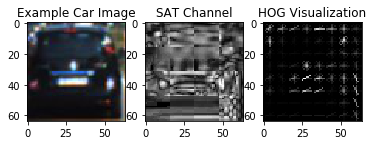

In [276]:
# Code Block 07sat
image1 = mpimg.imread(folder_cars1+'272.jpeg')
image1 = cv2.resize(image1, (64,64))
gray = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
hsv = cv2.cvtColor(image1, cv2.COLOR_RGB2HSV)
sat = hsv[:,:,1]

orient = 6
pix_per_cell = 8
cell_per_block = 2
# Call our function with vis=True to see an image output
features, hog_image = get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)

# Plot the examples
fig = plt.figure()
plt.subplot(131)
plt.imshow(image1)
plt.title('Example Car Image')
plt.subplot(132)
plt.imshow(sat, cmap='gray')
plt.title('SAT Channel')
plt.subplot(133)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')
print("Hough Features shape", features.shape)

Sat dimentions:  (32, 32)
Hog elements: (1176,) Sat elements:  (1024,)
Final vector elements (2200, 1)


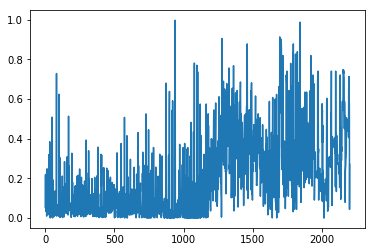

In [277]:
# Code Block 07
res = cv2.resize(sat,None,fx=1/2, fy=1/2, interpolation = cv2.INTER_CUBIC)
print("Sat dimentions: ",res.shape)

feature_list = [features.ravel()/0.5, res.ravel().astype(np.float64)/255.0]
# Create an array stack, NOTE: StandardScaler() expects np.float64
X = np.concatenate(feature_list).astype(np.float64)
X = X.reshape(-1, 1)
print("Hog elements:",feature_list[0].shape,"Sat elements: ", feature_list[1].shape)
print("Final vector elements", X.shape)

plt.plot(X)

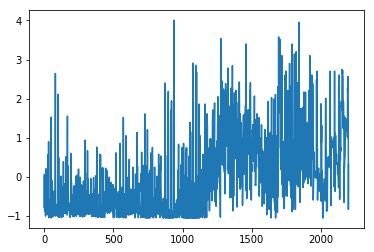

In [278]:
# Code Block 08
# Fit a per-column scaler
Test_X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = Test_X_scaler.transform(X)
plt.plot(scaled_X)

Total Feature Vector Size: (5860,)


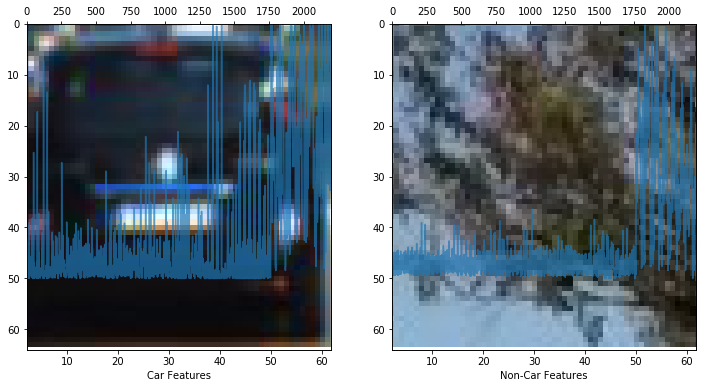

In [280]:
# Code Block 09
def featurizer(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    sat = hsv[:,:,1]

    orient = 9
    pix_per_cell = 8
    cell_per_block = 2
    # Call our function with vis=True to see an image output
    res = cv2.resize(sat,(64, 64))
    gray = cv2.resize(gray,(64, 64))
    features = get_hog_features(gray, orient, 
                pix_per_cell, cell_per_block, 
                vis=False, feature_vec=False)
    feature_list = [features.ravel(), res.ravel().astype(np.float64)/255]
    # Create an array stack, NOTE: StandardScaler() expects np.float64
    X = np.concatenate(feature_list).astype(np.float64)
    #X = X.reshape(-1, 1)
    return np.ravel(X)

fig_size= [12, 6]
plt.rcParams["figure.figsize"] = fig_size

feat1 = featurizer(image1)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(image1)
ax1.set_aspect('equal')
ax2 = ax1.twiny()
ax2.plot(-feat1*100+50, alpha=0.7)
ax2.set_xlim([0,2200])
ax2.set_ylim([64,0])
ax1.set_xlim([0,64])
ax1.set_ylim([64,0])
ax1.set_xlabel('Car Features')
feat2 = featurizer(image2)

axa = fig.add_subplot(122)
axa.imshow(image2)
axa.set_aspect('equal')
axb = axa.twiny()
axb.plot(-feat2*100+50, alpha=0.7)
axb.set_xlim([0,2200])
axb.set_ylim([64,0])
axa.set_xlim([0,64])
axa.set_ylim([64,0])
axa.set_xlabel('Non-Car Features')
print("Total Feature Vector Size:", feat1.shape)

In [281]:
# Code Block 10
# And our file dirs for the pipeline test
images_cars = glob.glob(folder_cars1 + '*.jpeg')
images_notcars = glob.glob(folder_noncars1 + '*.jpeg')
Y = []
X = []
for image_name in images_cars:
    image = cv2.imread(image_name)
    if len(image):
        tempfeat = featurizer(image)
        X.append(tempfeat)
        Y.append(1)
for image_name in images_notcars:
    image = cv2.imread(image_name)
    if len(image):
        tempfeat = featurizer(image)
        X.append(tempfeat)
        Y.append(0)
X_scaler = StandardScaler().fit(X)
test_features = X_scaler.transform(X)
print("Check parity between Labels and samples")
print("Labels:", len(Y))
print("Samples:", len(test_features))

Check parity between Labels and samples
Labels: 797
Samples: 797


In [282]:
# Code Block 11

# Shuffle the data
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
test_features, y = shuffle(X, Y)
X_train, X_test, y_train, y_test = train_test_split(test_features, y, test_size=0.2, random_state=42)

In [283]:
# Code Block 12
print("The train set length is:")
print("Labels ", len(y_train))
print("Samples ", len(X_train))
print("The test set length is:")
print("Labels ", len(y_test))
print("Samples ", len(X_test))

The train set length is:
Labels  637
Samples  637
The test set length is:
Labels  160
Samples  160


In [284]:
# Code Block 13
from sklearn import svm
clf = svm.LinearSVC()#svm.SVC(kernel = "linear", C = 0.1)
clf.fit(X_train, y_train)
train_precision = clf.score(X_train, y_train)
test_precision = clf.score(X_test, y_test)
print("train precision: ",train_precision)
print("test_precision: ", test_precision)

train precision:  1.0
test_precision:  0.93125


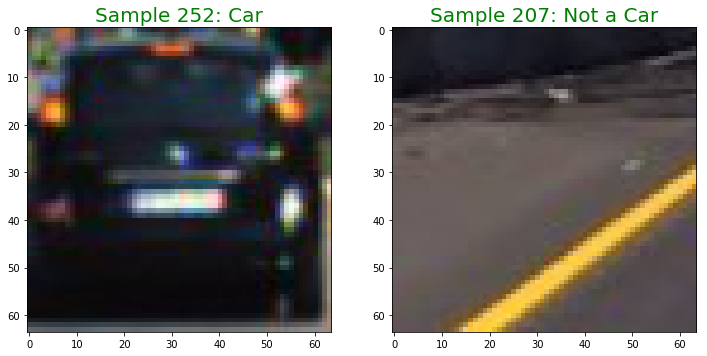

In [285]:
# Code Block 14
import random as rd

image_ind1 = rd.randint(0, len(images_cars)-1)
testimg1 = mpimg.imread(images_cars[image_ind1])
testfeat1 = featurizer(testimg1)

image_ind2 = rd.randint(0, len(images_notcars)-1)
testimg2 = mpimg.imread(images_notcars[image_ind2])
testfeat2 = featurizer(testimg2)

fig_size= [12, 6]
plt.rcParams["figure.figsize"] = fig_size

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(testimg1)
if clf.predict([testfeat1]):
    ax1.set_title('Sample '+str(image_ind1)+': Car', color = 'green', fontsize=20)
else:
    ax1.set_title('Sample '+str(image_ind1)+': Not a Car', color = 'red', fontsize=20)

axa = fig.add_subplot(122)
axa.imshow(testimg2)
if clf.predict([testfeat2]):
    axa.set_title('Sample '+str(image_ind2)+': Car', color = 'red', fontsize=20)
else:
    axa.set_title('Sample '+str(image_ind2)+': Not a Car', color = 'green', fontsize=20)


## Saving point

In [286]:
# Code Block 15
# Save the model for future use

joblib.dump(clf, 'SVCmodel.pkl') 

['SVCmodel.pkl']

In [287]:
# Code Block 16
clf2 = joblib.load('SVCmodel.pkl') 

### Sliding windows model

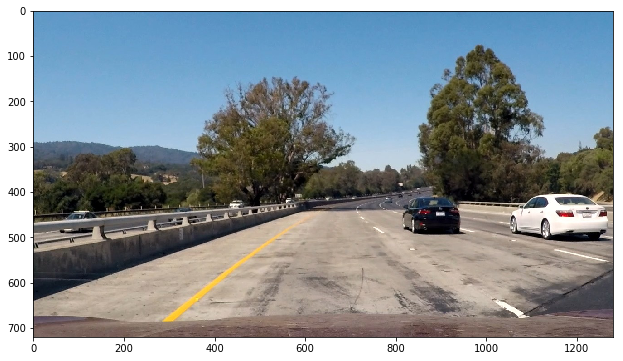

In [288]:
# Code Block 17

image1 = mpimg.imread('test_images/test1.jpg')
plt.imshow(image1)

In [289]:
# Code Block 18
def window(img, x_start_stop=[336, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    xstrtstop = [0, 0]
    ystrtstop = [0, 0]
    image = img
    plt.imshow(img)
    if x_start_stop[0] == None:
        xstrtstop[0] = 0
    else:
        xstrtstop[0] = x_start_stop[0]
    if x_start_stop[1] == None:
        xstrtstop[1] = image.shape[1]
    else:
        xstrtstop[1] = x_start_stop[1] 
    if y_start_stop[0] == None:
        ystrtstop[0] = 0
    else:
        ystrtstop[0] = y_start_stop[0] 
    if y_start_stop[1] == None:
        ystrtstop[1] = image.shape[0]
    else:
        ystrtstop[1] = y_start_stop[1]
    # Compute the span of the region to be searched    
    xspan = xstrtstop[1] - xstrtstop[0]
    yspan = ystrtstop[1] - ystrtstop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step)

    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + xstrtstop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + ystrtstop[0]
            endy = starty + xy_window[1]
            # yield window
            window = [starty, endy, startx, endx]
            yield window
    # If the image is fully explored return None
    yield None

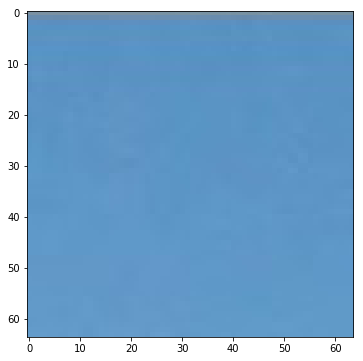

In [290]:
# Code Block 19
# Let's try the function asking for the first window
frame = window(image1)
slot = next(frame)
plt.imshow(image1[slot[0]:slot[1],slot[2]:slot[3]])

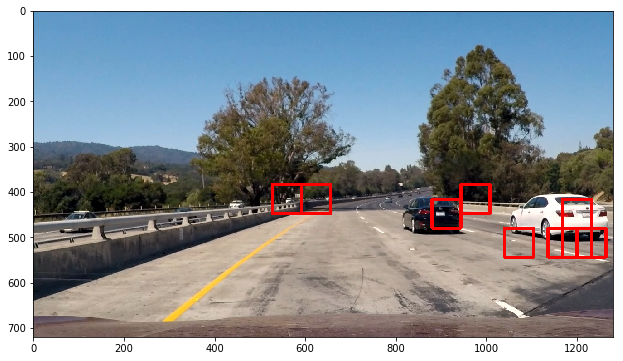

In [291]:
# Code Block 20
cars = []
frame = window(image1)
carornot = next(frame)
while carornot != None:
    testfeat = [featurizer(image1[carornot[0]:carornot[1],
                         carornot[2]:carornot[3]])]
    testfeat = X_scaler.transform(testfeat)
    if clf2.predict(testfeat):
        cars.append(carornot)
    carornot = next(frame)
img = np.copy(image1)
for car in cars:
    cv2.rectangle(img, (car[3], car[1]),
                  (car[2], car[0]), color = (255, 0, 0), thickness=6)
plt.imshow(img)

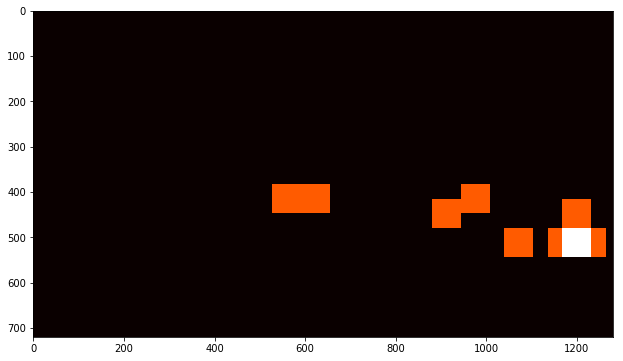

In [292]:
# Code Block 21
heatframe = np.zeros_like(grayscale(image1))
for car in cars:
    heatframe[car[0]:car[1],car[2]:car[3]]+=1
plt.imshow(heatframe, cmap="hot")

## Final Steps

In [294]:
# Code Block 01
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
import glob
import os
from sklearn.externals import joblib
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [295]:
# Code Block 02
folder_cars1 = "training/small/vehicles_smallset/cars1/"
folder_cars2 = "training/small/vehicles_smallset/cars2/"
folder_cars3 = "training/small/vehicles_smallset/cars3/"
folder_noncars1 = "training/small/non-vehicles_smallset/notcars1/"
folder_noncars2 = "training/small/non-vehicles_smallset/notcars2/"
folder_noncars3 = "training/small/non-vehicles_smallset/notcars3/"

In [396]:
# Code Block 09
def featurizer(img):
    img = cv2.resize(img, (64,64))
    kernel_size = 5
    pixfeatures = cv2.GaussianBlur(
        img, (kernel_size, kernel_size), 0)
    #pixfeatures1 = cv2.resize(pixfeatures[:,:,0],(16,16))
    hsv = cv2.cvtColor(cv2.resize(img, (64,64)), cv2.COLOR_RGB2HSV)
    edge = cv2.Canny(hsv[:,:,2],100,200)
    #sat = img[:,:,1]
    #pixfeatures1 = cv2.resize(hsv[:,:,0],(16,16))
    #gray = img[:,:,0]
    ch1 = pixfeatures[:,:,0]
    ch2 = pixfeatures[:,:,1]
    ch3 = pixfeatures[:,:,2]
    orient = 9
    pix_per_cell = 8
    cell_per_block = 1
    # Call our function with vis=True to see an image output
    hogfeatures1 = get_hog_features(ch1, orient, 
                pix_per_cell, cell_per_block,
                vis=False, feature_vec=False)
    hogfeatures2 = get_hog_features(ch2, orient, 
                pix_per_cell, cell_per_block,
                vis=False, feature_vec=False)
    hogfeatures3 = get_hog_features(ch3, orient, 
                pix_per_cell, cell_per_block,
                vis=False, feature_vec=False)
    bins_range=(0, 256)
    #hist1 = np.histogram(img[:,:,0], bins=32, range=bins_range)
    hist2 = np.histogram(img[:,:,2], bins=32)
    #hist3 = np.histogram(img[:,:,2], bins=32, range=bins_range)
    #histfeatures = np.concatenate((hist1[0], hist2[0], hist3[0]))
    feature_list = [hogfeatures1.ravel(), hogfeatures2.ravel(), hogfeatures3.ravel(),
                    hsv[:,:,1].ravel()/255, edge.ravel()/255]
    # Create an array stack, NOTE: StandardScaler() expects np.float64
    X = np.concatenate(feature_list).astype(np.float64)
    X = X.reshape(-1, 1)
    return np.ravel(X)

In [397]:
# Code Block 10
# And our file dirs for the pipeline test
images_cars = glob.glob(folder_cars1 + '*.jpeg')
images_cars = np.concatenate((images_cars,
                glob.glob(folder_cars2 + '*.jpeg'),
                glob.glob(folder_cars3 + '*.jpeg'),
               ))
images_notcars = glob.glob(folder_noncars1 + '*.jpeg')
images_notcars = np.concatenate((images_notcars,
                glob.glob(folder_noncars2 + '*.jpeg'),
                glob.glob(folder_noncars3 + '*.jpeg'),
               ))

Y = []
X = []
for image_name in images_cars:
    image = mpimg.imread(image_name)
    if len(image):
        tempfeat = featurizer(image)
        X.append(tempfeat)
        Y.append(1)
    del image
for image_name in images_notcars:
    image = mpimg.imread(image_name)
    if len(image):
        tempfeat = featurizer(image)
        X.append(tempfeat)
        Y.append(0)
    del image
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

print("Total lanels:", len(Y))
print("Total Samples:", len(scaled_X))
print("Feature vector length:", len(scaled_X[0]))

Total lanels: 2322
Total Samples: 2322
Feature vector length: 9920


In [398]:
# Code Block 11

# Shuffle the data
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, Y, test_size=0.2, random_state=0)

In [399]:
# Code Block 12
print("The train set length is:")
print("Labels ", len(y_train))
print("Samples ", len(X_train))
print("The test set length is:")
print("Labels ", len(y_test))
print("Samples ", len(X_test))

The train set length is:
Labels  1857
Samples  1857
The test set length is:
Labels  465
Samples  465


In [400]:
from sklearn import svm
from sklearn.svm import LinearSVC
clf = svm.SVC()
clf.fit(X_train, y_train)
train_precision = clf.score(X_train, y_train)
test_precision = clf.score(X_test, y_test)
print("train precision: ",train_precision)
print("test_precision: ", test_precision)
del X_train
del y_train
del X_test
del y_test
del X
del Y

train precision:  0.999461497038
test_precision:  0.98064516129


In [401]:
# Code Block 15
# Save the model for future use

joblib.dump(clf, 'SVCmodelII.pkl') 

['SVCmodelII.pkl']

In [402]:
# Code Block 16
clf2 = joblib.load('SVCmodelII.pkl') 

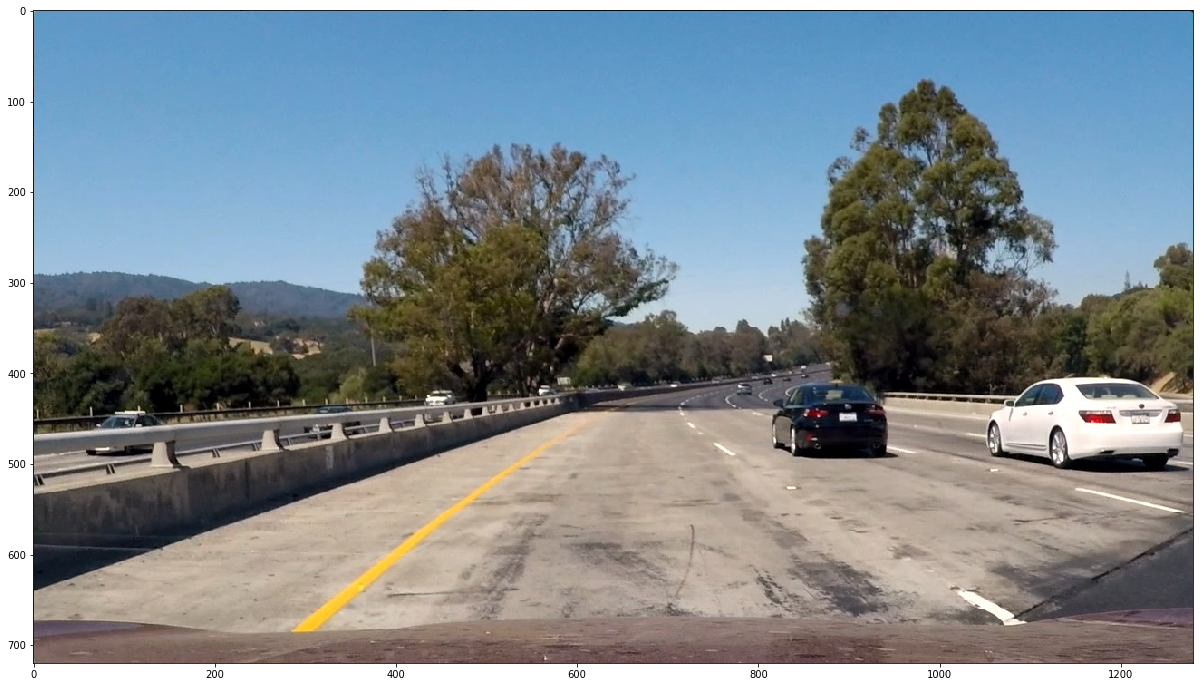

In [403]:
def window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    xstrtstop = [0, img.shape[1]]
    ystrtstop = [0, img.shape[0]]
    if x_start_stop[0] != None:
        xstrtstop[0] = x_start_stop[0]
    if x_start_stop[1] != None:
        xstrtstop[1] = x_start_stop[1] 
    if y_start_stop[0] != None:
        ystrtstop[0] = y_start_stop[0] 
    if y_start_stop[1] != None:
        ystrtstop[1] = y_start_stop[1]
    # Compute the span of the region to be searched    
    xspan = xstrtstop[1] - xstrtstop[0]
    yspan = ystrtstop[1] - ystrtstop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step)

    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + xstrtstop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + ystrtstop[0]
            endy = starty + xy_window[1]
            # yield window
            window = [startx, endx, starty, endy]
            #print(window, startx- endx, starty- endy)
            if endx<=img.shape[1] and endy<=img.shape[0]:
                yield window
    # If the image is fully explored return None
    yield None
image1 = mpimg.imread('test_images/test1.jpg')
plt.imshow(image1)

In [409]:
def detectcars(img,window_size = 64, ystartstop=[None, None], overlap = 0.5):
    cars = []
    frame = window(img, xy_window=(window_size, window_size),
                   y_start_stop = ystartstop, xy_overlap=(overlap, overlap))
    carornot = next(frame)
    while carornot != None:
        testfeat = [featurizer(image1[carornot[2]:carornot[3],
                           carornot[0]:carornot[1]])]
        scaled_testfeat = X_scaler.transform(testfeat)
        if clf2.predict(scaled_testfeat):
            cars.append(carornot)
        carornot = next(frame)
        #print(carornot)
    return cars
ystart = 400
yend = 656
cars64 = detectcars(image1, window_size = 32, ystartstop=[ystart, yend], overlap = 0.9)
cars128 = detectcars(image1, window_size = 64, ystartstop=[ystart, yend], overlap = 0.9)
cars256 = detectcars(image1, window_size = 128, ystartstop=[ystart, yend], overlap = 0.9)
cars = []
if len(cars64)>0:
    cars = cars64
if len(cars128)>0:
    cars = np.concatenate((cars, cars128))
if len(cars256)>0:
    cars = np.concatenate((cars, cars256))

#cars = np.concatenate((cars32, cars64, cars128))
print(cars)

[[ 513  545  400  432]
 [ 516  548  400  432]
 [ 519  551  400  432]
 [ 522  554  400  432]
 [1032 1064  400  432]
 [1035 1067  400  432]
 [1044 1076  400  432]
 [1047 1079  400  432]
 [1050 1082  400  432]
 [1053 1085  400  432]
 [1056 1088  400  432]
 [1059 1091  400  432]
 [ 498  530  403  435]
 [ 501  533  403  435]
 [ 504  536  403  435]
 [ 507  539  403  435]
 [ 510  542  403  435]
 [ 513  545  403  435]
 [ 516  548  403  435]
 [ 528  560  403  435]
 [ 873  905  403  435]
 [1053 1085  403  435]
 [1101 1133  403  435]
 [1104 1136  403  435]
 [1107 1139  403  435]
 [ 366  398  406  438]
 [ 981 1013  406  438]
 [ 984 1016  406  438]
 [ 987 1019  406  438]
 [ 990 1022  406  438]
 [1098 1130  406  438]
 [1101 1133  406  438]
 [1104 1136  406  438]
 [1107 1139  406  438]
 [1110 1142  406  438]
 [ 294  326  409  441]
 [ 297  329  409  441]
 [1053 1085  409  441]
 [1089 1121  409  441]
 [1098 1130  409  441]
 [1101 1133  409  441]
 [1104 1136  409  441]
 [1107 1139  409  441]
 [1110 1142

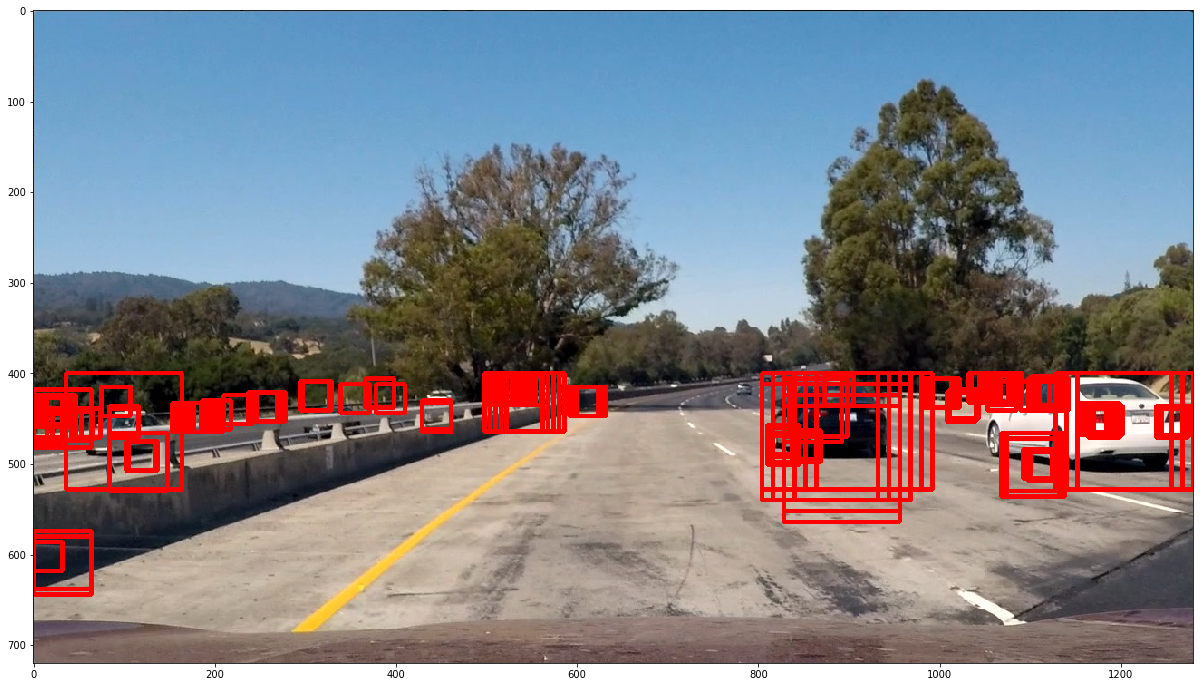

In [410]:
img = np.copy(image1)
for car in cars:
    cv2.rectangle(img, (car[0], car[2]),
                  (car[1], car[3]), color = (255, 0, 0), thickness=4)
fig_size= [24,12]
plt.rcParams["figure.figsize"] = fig_size
plt.imshow(img)

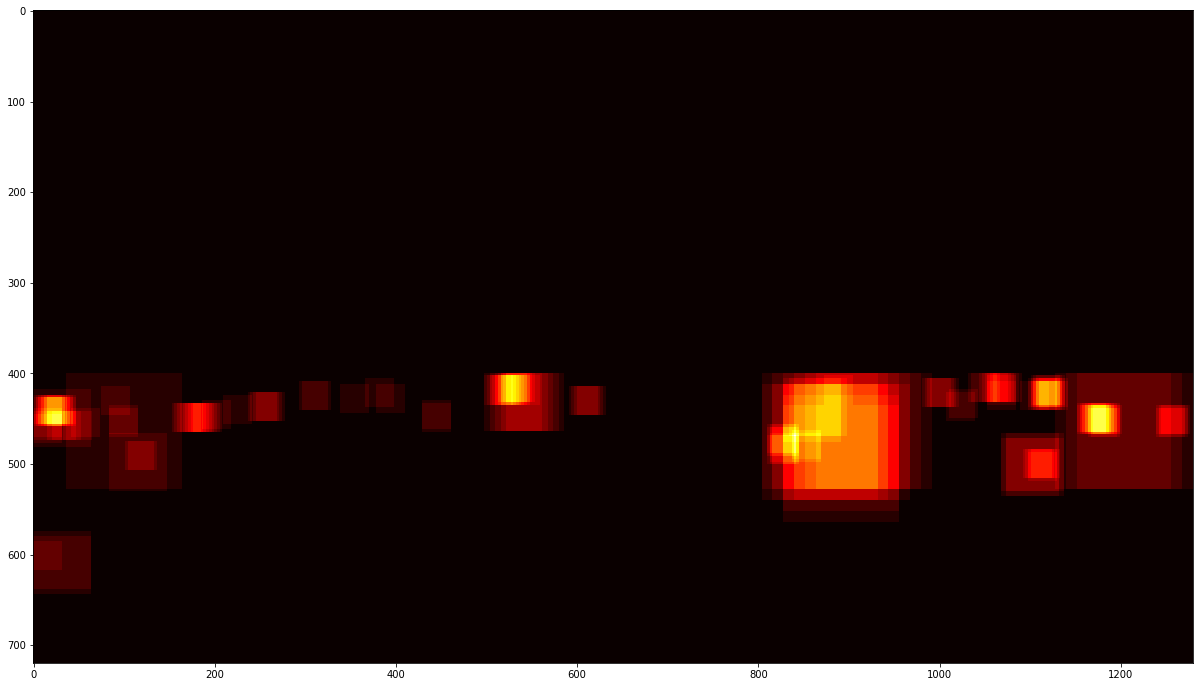

In [411]:
heatframe = np.zeros_like(grayscale(image1))
for car in cars:
    heatframe[car[2]:car[3],car[0]:car[1]]+=1
plt.imshow(heatframe, cmap="hot")

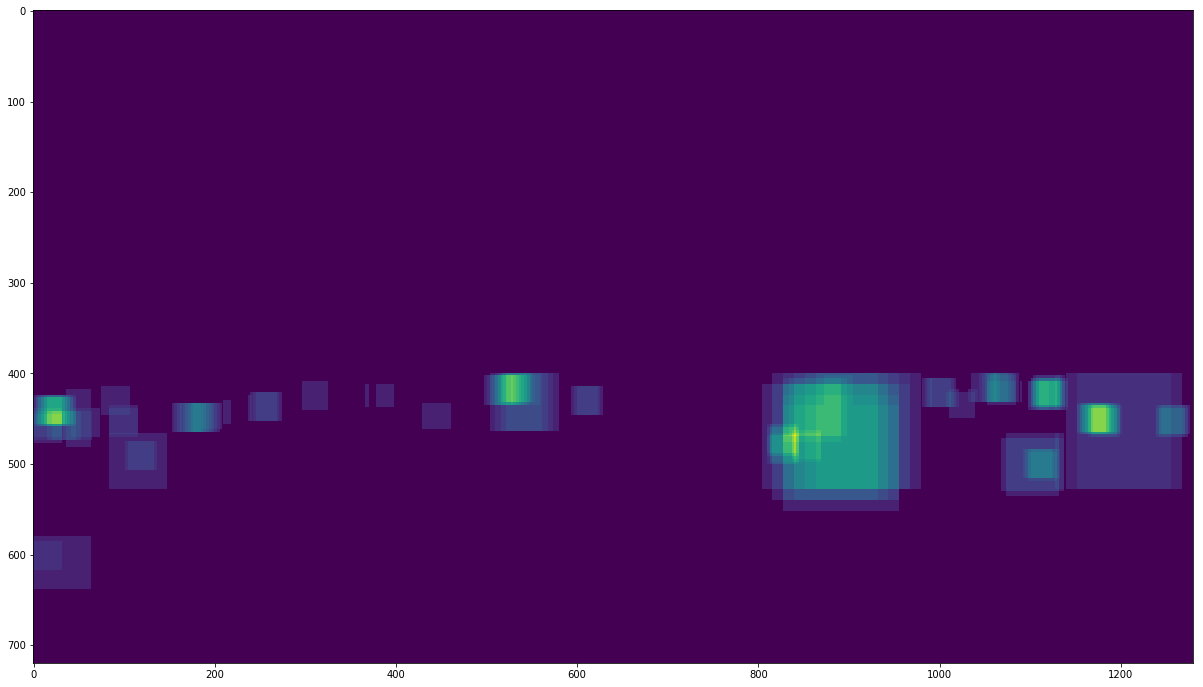

In [415]:
heat = np.copy(heatframe)
bins_range=(0, 200)
hist = np.histogram(heat, bins=32, range=bins_range)
#plt.plot(hist[0][0:-1])

#heatbinary = np.zeros_like(heat)
heat[(heat <= 1)] = 0
plt.imshow(heat)

17 cars found


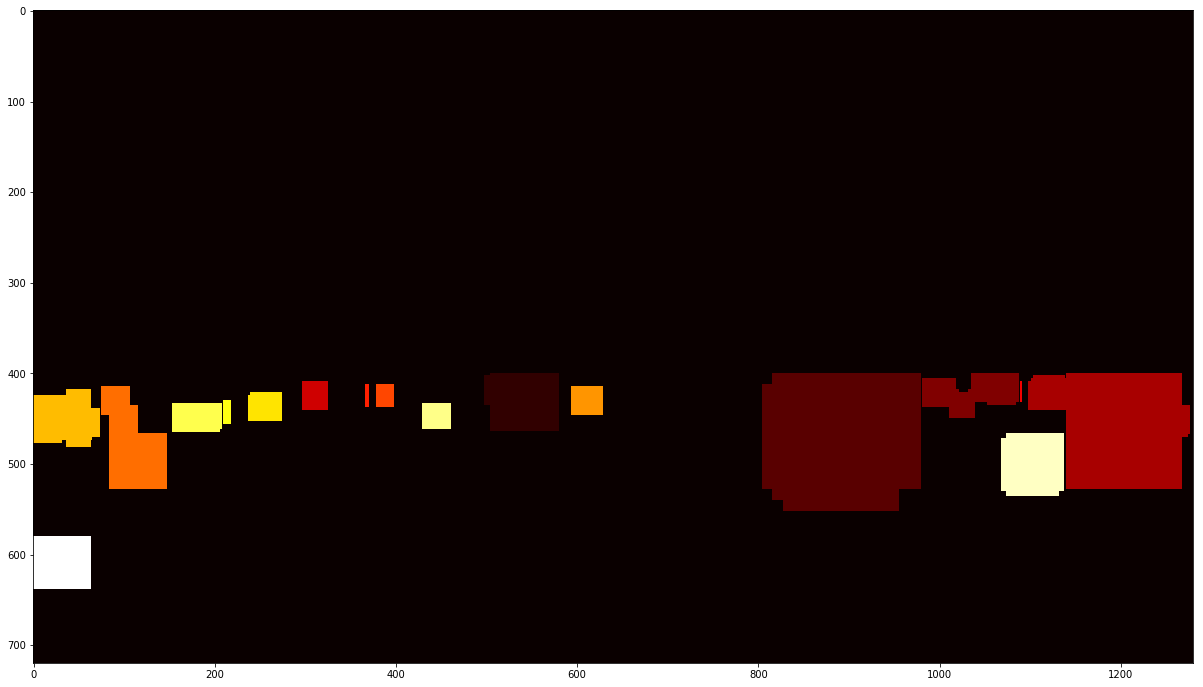

In [416]:
from scipy.ndimage.measurements import label
heatmap = np.copy(heat)
#heatmap = threshold(heatmap, 2)
labels = label(heatmap)
print(labels[1], 'cars found')
plt.imshow(labels[0], cmap="hot")

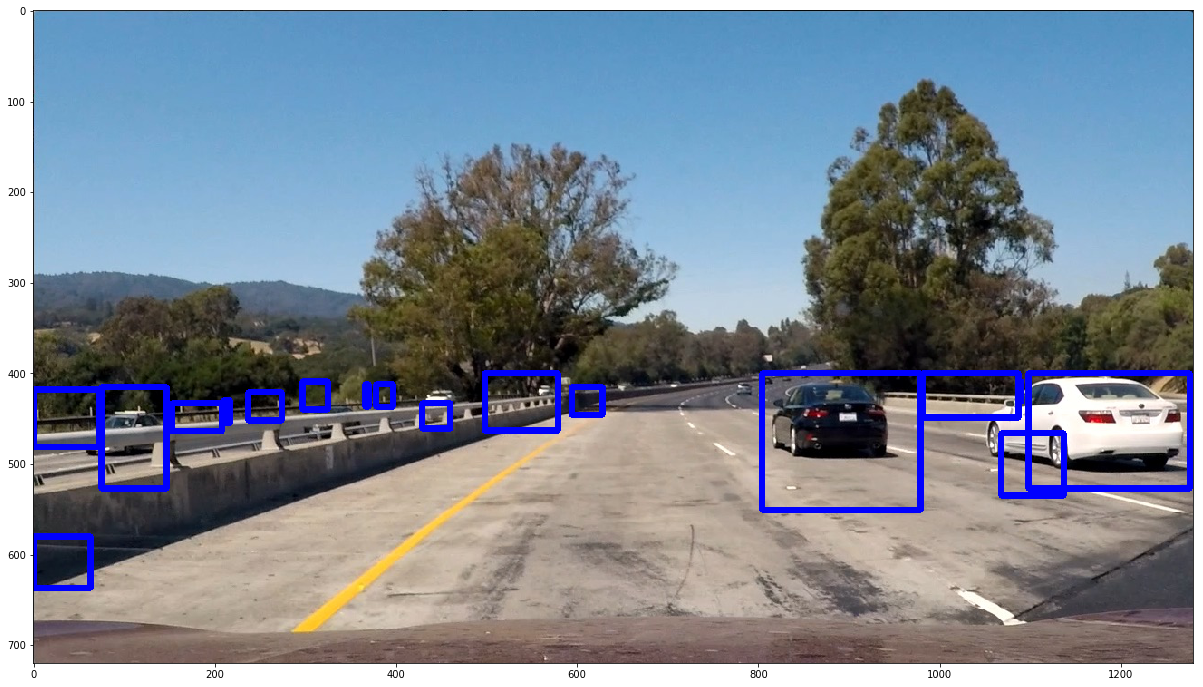

In [417]:
def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

# Draw bounding boxes on a copy of the image
draw_img = draw_labeled_bboxes(np.copy(image1), labels)
# Display the image
plt.imshow(draw_img)

## With the pipeline done, let's arm it

### First, divide and conquer

In [418]:
# Code Block 24
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
import glob
import os
from sklearn.externals import joblib
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from scipy.ndimage.measurements import label
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import LinearSVC

%matplotlib inline

In [443]:
# Code Block 25
# Define a class to receive the characteristics of each line detection
def featurizer(img):
    
    kernel_size = 5
    pixfeatures = cv2.GaussianBlur(
        cv2.resize(img, (64,64)), (kernel_size, kernel_size), 0)
    #pixfeatures1 = cv2.resize(pixfeatures[:,:,0],(16,16))
    #pixfeatures1 = cv2.resize(pixfeatures[:,:,0],(16,16))
    hsv = cv2.cvtColor(pixfeatures, cv2.COLOR_RGB2HSV)
    edge = cv2.Canny(hsv[:,:,2],100,200)
    #sat = img[:,:,1]
    #pixfeatures1 = cv2.resize(hsv[:,:,0],(16,16))
    #gray = img[:,:,0]
    ch1 = pixfeatures[:,:,0]
    ch2 = pixfeatures[:,:,1]
    ch3 = pixfeatures[:,:,2]
    orient = 9
    pix_per_cell = 8
    cell_per_block = 2
    # Call our function with vis=True to see an image output
    hogfeatures1 = get_hog_features(ch1, orient, 
                pix_per_cell, cell_per_block,
                vis=False, feature_vec=False)
    hogfeatures2 = get_hog_features(ch2, orient, 
                pix_per_cell, cell_per_block,
                vis=False, feature_vec=False)
    hogfeatures3 = get_hog_features(ch3, orient, 
                pix_per_cell, cell_per_block,
                vis=False, feature_vec=False)
    bins_range=(0, 256)
    #hist1 = np.histogram(img[:,:,0], bins=32, range=bins_range)
    hist2 = np.histogram(img[:,:,2], bins=32, range=bins_range)
    #hist3 = np.histogram(img[:,:,2], bins=32, range=bins_range)
    #histfeatures = np.concatenate((hist1[0], hist2[0], hist3[0]))
    feature_list = [hogfeatures1.ravel(), hogfeatures2.ravel(), hogfeatures3.ravel(),
                    edge.ravel()/255, hist2[0].ravel()]
    # Create an array stack, NOTE: StandardScaler() expects np.float64
    X = np.concatenate(feature_list).astype(np.float64)
    X = X.reshape(-1, 1)
    return np.ravel(X)

# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        # Use skimage.hog() to get both features and a visualization
        features ,hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell,pix_per_cell) , cells_per_block=(cell_per_block, cell_per_block), visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    else:      
        # Use skimage.hog() to get features only
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell,pix_per_cell) , cells_per_block=(cell_per_block, cell_per_block), visualise=vis, feature_vector=feature_vec)
        return features

def window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    xstrtstop = [0, img.shape[1]]
    ystrtstop = [0, img.shape[0]]
    if x_start_stop[0] != None:
        xstrtstop[0] = x_start_stop[0]
    if x_start_stop[1] != None:
        xstrtstop[1] = x_start_stop[1] 
    if y_start_stop[0] != None:
        ystrtstop[0] = y_start_stop[0] 
    if y_start_stop[1] != None:
        ystrtstop[1] = y_start_stop[1]
    # Compute the span of the region to be searched    
    xspan = xstrtstop[1] - xstrtstop[0]
    yspan = ystrtstop[1] - ystrtstop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step)

    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + xstrtstop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + ystrtstop[0]
            endy = starty + xy_window[1]
            # yield window
            window = [startx, endx, starty, endy]
            #print(window, startx- endx, starty- endy)
            if endx<=img.shape[1] and endy<=img.shape[0]:
                yield window
    # If the image is fully explored return None
    yield None

def detectcars(img, window_size = 64, ystartstop=[None, None], overlap = 0.5):
    cars = []
    frame = window(img, xy_window=(window_size, window_size),
                   y_start_stop = ystartstop, xy_overlap=(overlap, overlap))
    carornot = next(frame)
    while carornot != None:
        feat = [featurizer(img[carornot[2]:carornot[3],
                               carornot[0]:carornot[1]])]
        scaled_feat = X_scaler.transform(feat)
        if clf2.predict(scaled_feat):
            cars.append(carornot)
        carornot = next(frame)
    return cars

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

In [444]:
# Code Block 02
folderC = []
#folderC.append("training/big/vehicles/GTI*/")
folderC.append("training/small/vehicles_smallset/cars1/")
folderC.append("training/small/vehicles_smallset/cars2/")
folderC.append("training/small/vehicles_smallset/cars3/")
folderNC = []
#folderNC = "training/big/non-vehicles/Extras/"
folderNC.append("training/small/non-vehicles_smallset/notcars1/")
folderNC.append("training/small/non-vehicles_smallset/notcars2/")
folderNC.append("training/small/non-vehicles_smallset/notcars3/")

In [445]:
# Code Block 10
# And our file dirs for the pipeline test
images_cars = []#glob.glob(folderC[0] + '*.png')
for folder in folderC:
    images_cars.extend(glob.glob(folder + '*.jpeg'))
    images_cars.extend(glob.glob(folder + '*.png'))
print("Vehicles Samples: ",len(images_cars))

#images_notcars = glob.glob(folderNC + '*.png')
images_notcars = []
for folder in folderNC:
    images_notcars.extend(glob.glob(folder + '*.jpeg'))
    images_notcars.extend(glob.glob(folder + '*.png'))
print("Non-vehicles Samples: ",len(images_notcars))
Y = []
X = []
for image_name in images_cars:
    image = cv2.imread(image_name)
    if len(image):
        tempfeat = featurizer(image)
        X.append(tempfeat)
        Y.append(1)
    del image
for image_name in images_notcars:
    image = cv2.imread(image_name)
    if len(image):
        tempfeat = featurizer(image)
        X.append(tempfeat)
        Y.append(0)
    del image

X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

print("Total Labels: ", len(Y))
print("Total Samples: ", len(scaled_X))
print("Total features per sample: ", len(scaled_X[0]))

Vehicles Samples:  1197
Non-vehicles Samples:  1125
Total Labels:  2322
Total Samples:  2322
Total features per sample:  4128


In [446]:
# Code Block 11

# Shuffle the data
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, Y, test_size=0.2, random_state=42)

In [447]:
# Code Block 12
print("The train set length is:")
print("Labels ", len(y_train))
print("Samples ", len(X_train))
print("The test set length is:")
print("Labels ", len(y_test))
print("Samples ", len(X_test))

The train set length is:
Labels  1857
Samples  1857
The test set length is:
Labels  465
Samples  465


In [448]:
# Code Block 13
clf = svm.LinearSVC()
clf.fit(X_train, y_train)
train_precision = clf.score(X_train, y_train)
test_precision = clf.score(X_test, y_test)
print("train precision: ",train_precision)
print("test_precision: ", test_precision)

train precision:  1.0
test_precision:  0.920430107527


In [449]:
del X_train
del y_train
del X_test
del y_test
del X
del Y
print("Training Data Deleted")

Training Data Deleted


In [450]:
joblib.dump(clf, 'SVCmodelIII.pkl')

['SVCmodelIII.pkl']

In [451]:
clf2 = clf

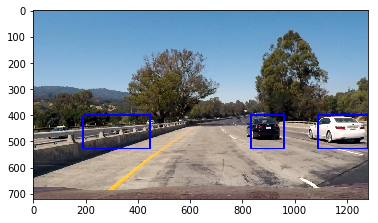

In [459]:
test_image = mpimg.imread('test_images/test1.jpg')
heatmap = np.zeros_like(test_image[:,:,0])
cars = []
cars = detectcars(test_image, window_size = 128, ystartstop=[400, None], overlap = 0.5)# 336, 656
for car in cars:
    heatmap[car[2]:car[3],car[0]:car[1]]+=1
heatmap[(heatmap <= 0)] = 0
labels = label(heatmap.astype(int))
# Draw bounding boxes on a copy of the image
draw_img = np.copy(test_image)
draw_img = draw_labeled_bboxes(test_image, labels)
plt.imshow(draw_img)

In [460]:
def trainer(dataset = 'small', method = 'LinearSVC', c=1.0, g='auto', k='linear'):
    if dataset == 'small':
        print("Loading Small dataset")
        folderC = []
        folderC.append("training/small/vehicles_smallset/cars1/")
        folderC.append("training/small/vehicles_smallset/cars2/")
        folderC.append("training/small/vehicles_smallset/cars3/")
        folderNC = []
        folderNC.append("training/small/non-vehicles_smallset/notcars1/")
        folderNC.append("training/small/non-vehicles_smallset/notcars2/")
        folderNC.append("training/small/non-vehicles_smallset/notcars3/")
    else:
        print("Loading Large dataset")
        folderC = ["training/big/vehicles/GTI*/"]
        folderC.append("training/small/vehicles_smallset/cars1/")
        folderC.append("training/small/vehicles_smallset/cars2/")
        folderC.append("training/small/vehicles_smallset/cars3/")
        folderNC = ["training/big/non-vehicles/Extras/"]
   # And our file dirs for the pipeline test
    images_cars = []
    for folder in folderC:
        images_cars.extend(glob.glob(folder + '*.jpeg'))
        images_cars.extend(glob.glob(folder + '*.png'))
    print("Vehicles Samples: ",len(images_cars))
    images_notcars = []
    for folder in folderNC:
        images_notcars.extend(glob.glob(folder + '*.jpeg'))
        images_notcars.extend(glob.glob(folder + '*.png'))
    print("Non-vehicles Samples: ",len(images_notcars))
    Y = []
    X = []
    for image_name in images_cars:
        image = cv2.imread(image_name)
        if len(image):
            tempfeat = featurizer(image)
            X.append(tempfeat)
            Y.append(1)
        del image
    for image_name in images_notcars:
        image = cv2.imread(image_name)
        if len(image):
            tempfeat = featurizer(image)
            X.append(tempfeat)
            Y.append(0)
        del image
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    print("Total Labels: ", len(Y))
    print("Total Samples: ", len(scaled_X))
    print("Total features per sample: ", len(scaled_X[0]))
    x, y = shuffle(scaled_X,Y)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    print("The train set have:")
    print(len(y_train), " Labels")
    print(len(X_train), " Samples")
    print("The test set have:")
    print(len(y_test), "Labels ")
    print(len(X_test), " Samples")
    if method == 'LinearSVC':
        clf = LinearSVC(C=c)
    else:
        clf = svm.SVC(C=c, kernel=k, gamma = g)
    clf.fit(X_train, y_train)
    train_precision = clf.score(X_train, y_train)
    test_precision = clf.score(X_test, y_test)
    print("train precision: ",train_precision)
    print("test_precision: ", test_precision)
    return clf, X_scaler

In [461]:
def MRdetectcar(img, maxsize = 64, th = 0, o = 0.3):
    sizes = [maxsize//4, maxsize//2, maxsize]
    y = img.shape[0]
    ystartstops = [[y//8, None], [y//4, None], [y//2, None]]
    tempimg = cv2.resize(img, None,fx=1/2**(len(sizes)-1),
                         fy=1/2**(len(sizes)-1), interpolation = cv2.INTER_CUBIC)
    heatmap = np.zeros_like(tempimg[:,:,0])
    cars = []

    for i in range(len(sizes)):
        tempheat = np.zeros_like(tempimg[:,:,0])
        yss = ystartstops[i]
        cars = detectcars(tempimg, window_size = sizes[i], ystartstop=yss, overlap = o)
        for car in cars:
            tempheat[car[2]:car[3],car[0]:car[1]]+=1
        tempheat[(tempheat <= th)] = 0
        heatmap += tempheat
        heatmap = cv2.resize(heatmap, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
        tempimg = cv2.resize(img, None,fx=1/2**(len(sizes)-i-2),
                             fy=1/2**(len(sizes)-i-2), interpolation = cv2.INTER_CUBIC)
    heatmap = cv2.resize(heatmap, None, fx=1/2, fy=1/2, interpolation = cv2.INTER_CUBIC)
    return heatmap

### And now lets try it all trogether [One pass]

In [462]:
clf2, X_scaler = trainer('large', c=0.3, method = 'SVC', g=10)
joblib.dump(clf2, 'SVCmodelIV.pkl')

Loading Large dataset
Vehicles Samples:  4023
Non-vehicles Samples:  5068
Total Labels:  9091
Total Samples:  9091
Total features per sample:  4128
The train set have:
7272  Labels
7272  Samples
The test set have:
1819 Labels 
1819  Samples
train precision:  0.998349834983
test_precision:  0.836173721825


['SVCmodelIV.pkl']

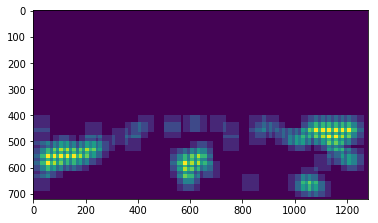

In [463]:
test_image = mpimg.imread('test_images/test1.jpg')
heatmap = np.zeros_like(test_image[:,:,0])
cars = []
cars = detectcars(test_image, window_size = 64, ystartstop=[400, None], overlap = 0.6)
for car in cars:
    heatmap[car[2]:car[3],car[0]:car[1]]+=1
heatmap[(heatmap <= 0)] = 0
labels = label(heatmap.astype(int))
# Draw bounding boxes on a copy of the image
draw_img = np.copy(test_image)
draw_img = draw_labeled_bboxes(test_image, labels)
plt.imshow(draw_img)

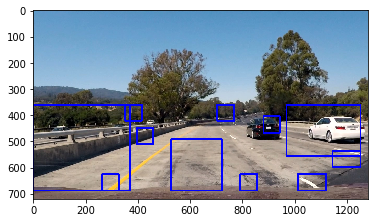

In [494]:
test_image = mpimg.imread('test_images/test1.jpg')
heat = heatmap
heat[(heatmap <= 0)] = 0
labels = label(heat.astype(int))
# Draw bounding boxes on a copy of the image
draw_img = np.copy(test_image)
draw_img = draw_labeled_bboxes(test_image, labels)
plt.imshow(draw_img)

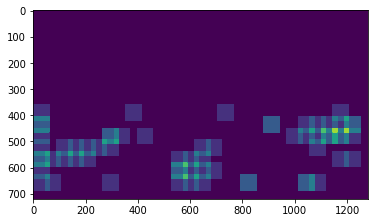

In [464]:
heatmap = MRdetectcar(test_image, th = 0)
labels = label(heatmap.astype(int))
# Draw bounding boxes on a copy of the image
draw_img = np.copy(test_image)
draw_img = draw_labeled_bboxes(test_image, labels)
plt.imshow(heatmap)

In [495]:
def car_detect_pipeline(img, th = 0, sizes = [32, 64, 128], o=0.3):
    global globalheatmap
    tempheatmap = np.zeros_like(img[:,:,0])
    for size in sizes:
        tempheatmap += MRdetectcar(img, size, th, o)
    globalheatmap = (globalheatmap + tempheatmap)//2
    labels = label(globalheatmap.astype(int))
    # Draw bounding boxes on a copy of the image
    draw_img = np.copy(test_image)
    draw_img = draw_labeled_bboxes(test_image, labels)
    return draw_img

Loading Large dataset
Vehicles Samples:  4023
Non-vehicles Samples:  5068
Total Labels:  9091
Total Samples:  9091
Total features per sample:  4128
The train set have:
7272  Labels
7272  Samples
The test set have:
1819 Labels 
1819  Samples
train precision:  1.0
test_precision:  0.728422210005


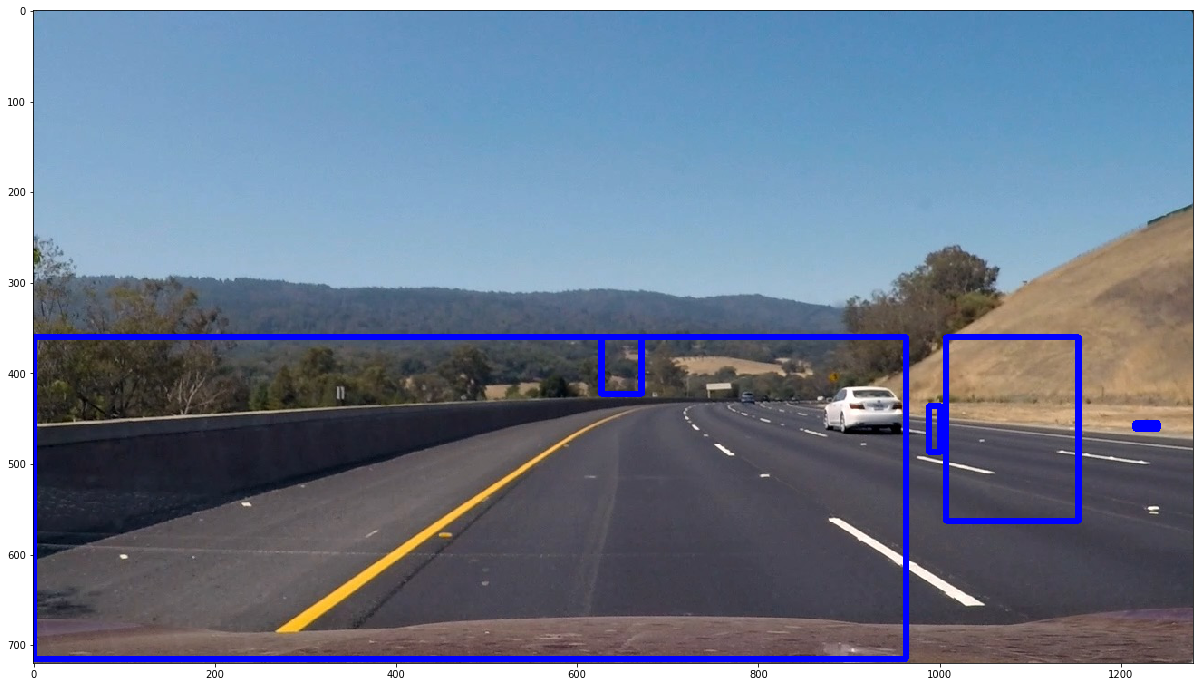

In [499]:
clf2, X_trainer = trainer('large', c=0.5, method = 'SVC', g=10, k = 'poly')
joblib.dump(clf, 'SVCmodelIV.pkl')
# Display the image
test_image = mpimg.imread('test_images/test3.jpg')
globalheatmap = np.zeros_like(test_image[:,:,0])
fig_size= [24, 12]
plt.rcParams["figure.figsize"] = fig_size
plt.imshow(car_detect_pipeline(test_image, th = 2, o=0.7))

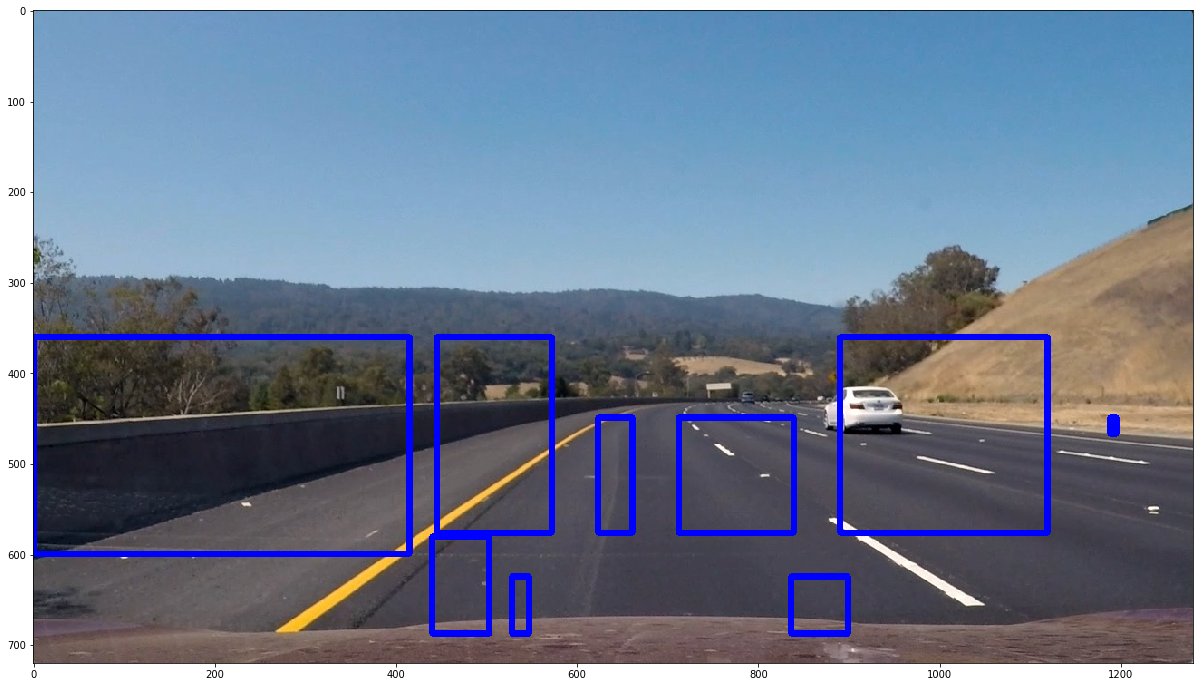

In [500]:
test_image = mpimg.imread('test_images/test3.jpg')
globalheatmap = np.zeros_like(test_image[:,:,0])
fig_size= [24, 12]
plt.rcParams["figure.figsize"] = fig_size
plt.imshow(car_detect_pipeline(test_image, th = 0, sizes = [32, 64, 128], o=0.3))

### Now let's find the best lane lines candidates

### Based on the best candidates averages the top best positive and negative slopes are draw

## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

**Note: if you get an `import error` when you run the next cell, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt. Also, check out [this forum post](https://carnd-forums.udacity.com/questions/22677062/answers/22677109) for more troubleshooting tips.**

**If you get an error that looks like this:**
```
NeedDownloadError: Need ffmpeg exe. 
You can download it by calling: 
imageio.plugins.ffmpeg.download()
```
**Follow the instructions in the error message and check out [this forum post](https://carnd-forums.udacity.com/display/CAR/questions/26218840/import-videofileclip-error) for more troubleshooting tips across operating systems.**

In [501]:
# Code Block 31
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

Let's try the one with the solid white lane on the right first ...

In [502]:
# Code Block 32
#lane = Line()
white_output = 'project_simon.mp4'
clip1 = VideoFileClip("test_video.mp4")
white_clip = clip1.fl_image(car_detect_pipeline) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video project_simon.mp4
[MoviePy] Writing video project_simon.mp4


 97%|█████████▋| 38/39 [30:50<00:48, 48.73s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_simon.mp4 

CPU times: user 31min 6s, sys: 160 ms, total: 31min 6s
Wall time: 30min 50s


Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [503]:
# Code Block 33
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

Now for the one with the solid yellow lane on the left. This one's more tricky!

## Writeup and Submission

If you're satisfied with your video outputs, it's time to make the report writeup in a pdf or markdown file. Once you have this Ipython notebook ready along with the writeup, it's time to submit for review! Here is a [link](https://github.com/simonmijares/CarNDT1P4.git) to the project.
